In [73]:
# importing necessary libraries

# Plotting libraries/settings# Plott 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data manipulation libraries/settings
import numpy as np
import pandas as pd
from functools import reduce;

# Machine learning library/functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

# Additional librariers used for modeling and evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score

from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})

# setting visual displays

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [74]:
# TPOT used to optimize and model pipelines

from tpot import TPOTClassifier

In [75]:
# Importing crime data

test18 = pd.read_csv('./Crime_Incidents_in_2018.csv')
df17 = pd.read_csv('./Crime_Incidents_in_2017.csv')
df16 = pd.read_csv('./Crime_Incidents_in_2016.csv')
df15 = pd.read_csv('./Crime_Incidents_in_2015.csv')
df14 = pd.read_csv('./Crime_Incidents_in_2014.csv')
df13 = pd.read_csv('./Crime_Incidents_in_2013.csv')
df12 = pd.read_csv('./Crime_Incidents_in_2012.csv')

# Exploring the data, most EDA was done in the EDA notebook

In [76]:
df17.head(3)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,-77.013517,38.920967,17111418,2017-06-30T08:28:54.000Z,DAY,OTHERS,THEFT/OTHER,100 - 199 BLOCK OF BRYANT STREET NW,398828.0,139232.0,...,Cluster 21,003301 3,3301.0,Precinct 135,38.920959,-77.013515,NaN,2017-06-22T18:00:49.000Z,2017-06-30T07:30:47.000Z,165452237
1,-76.922956,38.903484,17111426,2017-06-30T08:46:47.000Z,DAY,OTHERS,THEFT/OTHER,934 - 1099 BLOCK OF EASTERN AVENUE NE,406683.0,137294.0,...,Cluster 31,007807 2,7807.0,Precinct 95,38.903476,-76.922953,NaN,2017-06-30T08:02:00.000Z,2017-06-30T08:46:45.000Z,165452238
2,-76.942450,38.904648,17111445,2017-06-30T10:15:18.000Z,DAY,OTHERS,THEFT F/AUTO,4200 - 4299 BLOCK OF LANE PLACE NE,404992.0,137422.0,...,Cluster 29,009601 1,9601.0,Precinct 92,38.904640,-76.942448,NaN,2017-06-30T09:26:43.000Z,2017-06-30T10:15:16.000Z,165452239


In [77]:
df17.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID'],
      dtype='object')

In [78]:
df12.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID'],
      dtype='object')

- Unused code, saved for reference as to how to combine multiple dataframes

dataframes = [df17, df16, df15, df14, df13, df12]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['OBJECTID'],
                                            how='outer'), dataframes)

# Using Pandas to identify crime by year and ward/cluster, used to export to a CSV to do further analysis

In [79]:
df17_ncluster = df17.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [80]:
df17_ncluster.head()

NEIGHBORHOOD_CLUSTER  OFFENSE                   
Cluster 1             THEFT/OTHER                   305
                      THEFT F/AUTO                  282
                      MOTOR VEHICLE THEFT            40
                      ROBBERY                        34
                      ASSAULT W/DANGEROUS WEAPON     24
Name: OFFENSE, dtype: int64

In [81]:
df17_ward = df17.groupby('WARD')['OFFENSE'].value_counts()

# exported all df_ward groupby's to a csv, and then manually combined the csv's

df12_ward.to_csv('./wards12.csv')

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


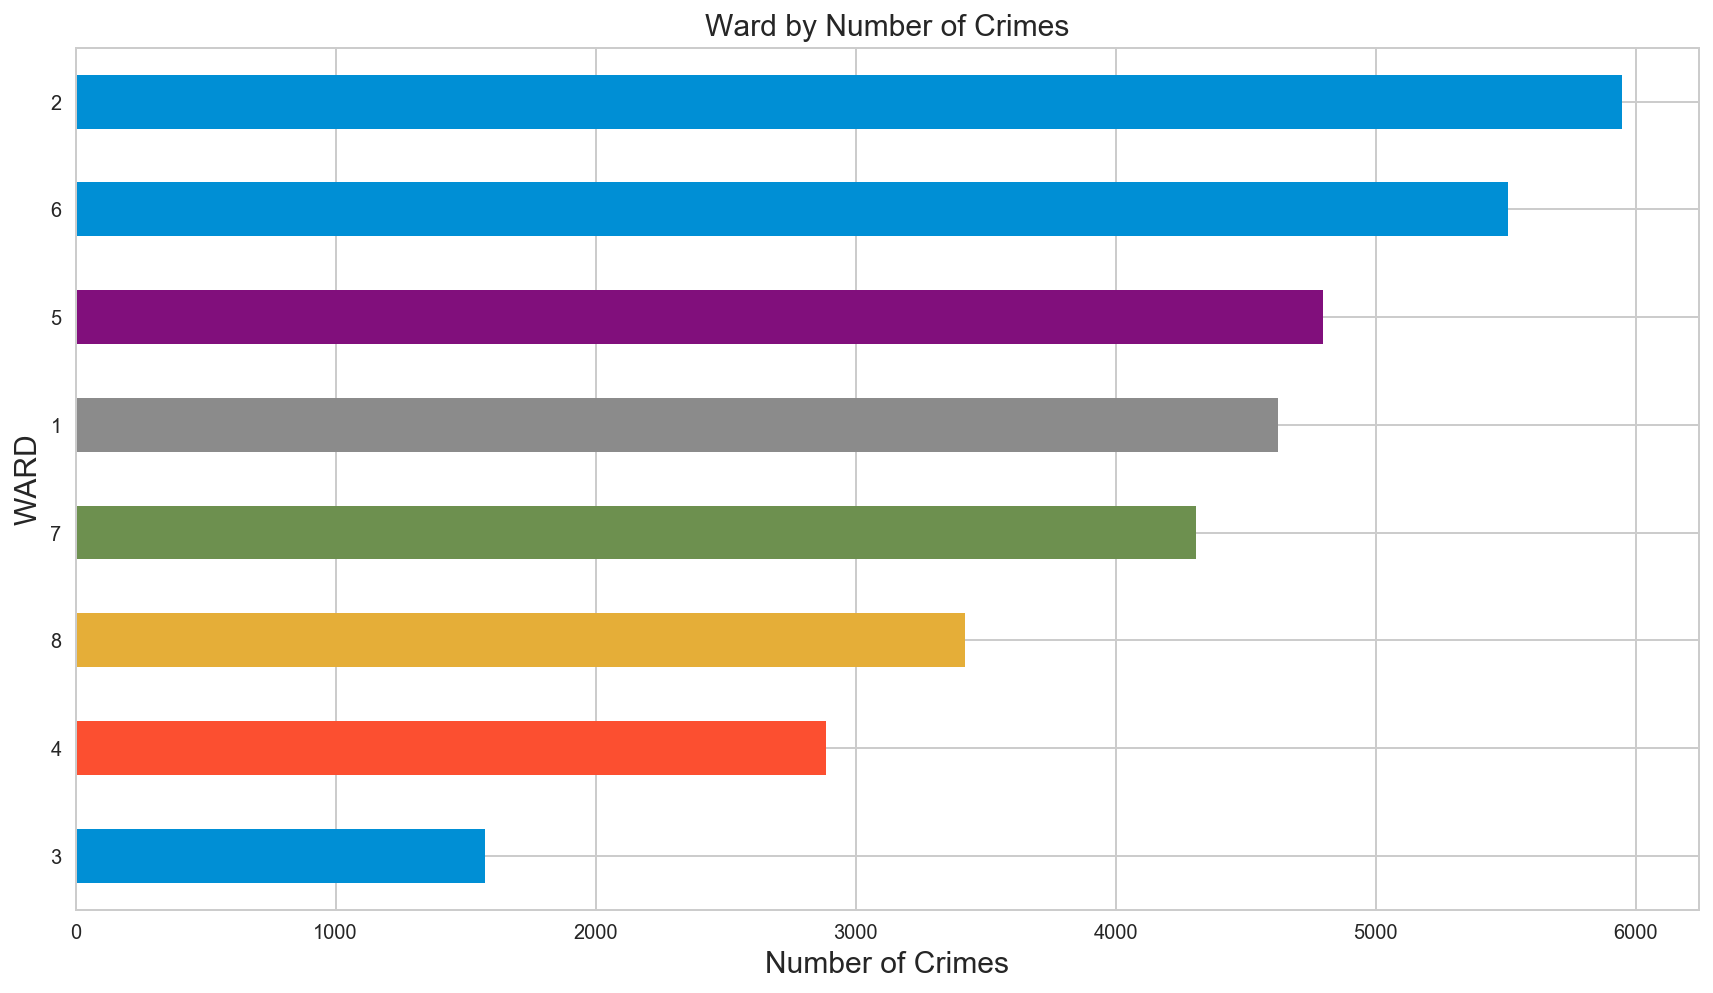

In [82]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df17.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [83]:
df16_ncluster = df16.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [84]:
df16_ward = df16.groupby('WARD')['OFFENSE'].value_counts()

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


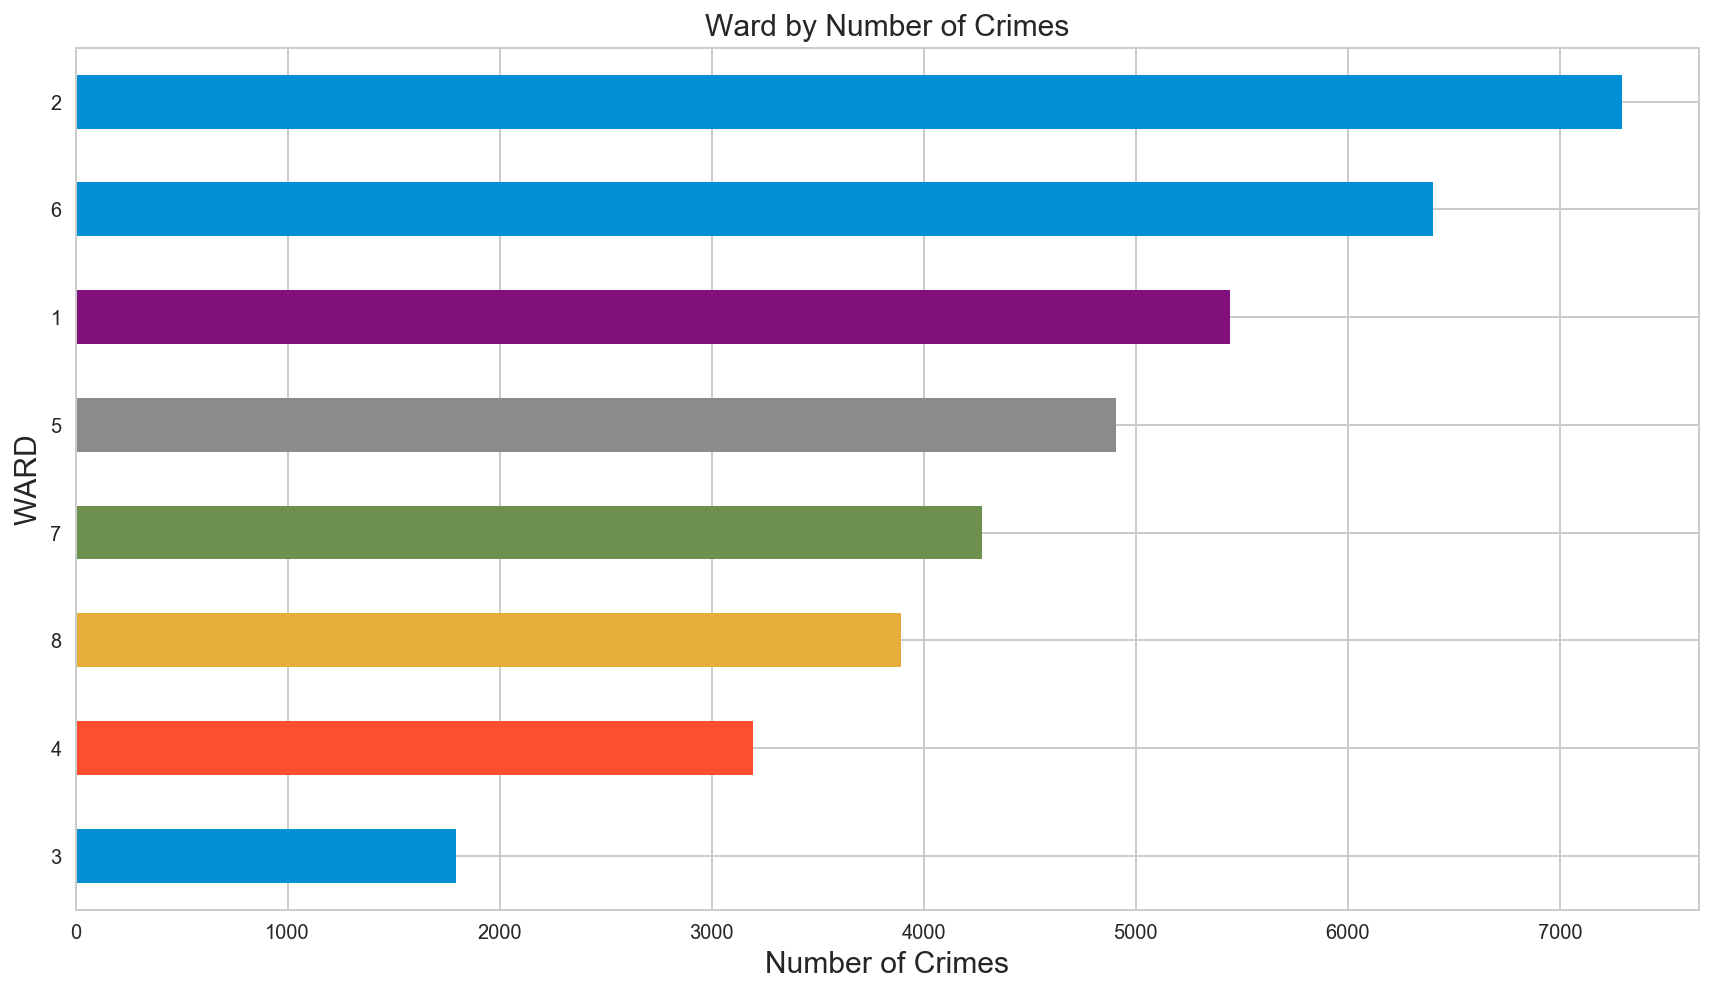

In [85]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df16.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [86]:
df15_ncluster = df15.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [87]:
df15_ward = df15.groupby('WARD')['OFFENSE'].value_counts()

In [88]:
df15_ward

WARD  OFFENSE                   
1     THEFT F/AUTO                  2223
      THEFT/OTHER                   1863
      ROBBERY                        481
      MOTOR VEHICLE THEFT            226
      BURGLARY                       219
      ASSAULT W/DANGEROUS WEAPON     192
      SEX ABUSE                       42
      HOMICIDE                        11
      ARSON                            1
2     THEFT/OTHER                   4015
      THEFT F/AUTO                  1789
      ROBBERY                        283
      MOTOR VEHICLE THEFT            227
      BURGLARY                       218
      ASSAULT W/DANGEROUS WEAPON     186
      SEX ABUSE                       50
      HOMICIDE                         4
3     THEFT/OTHER                    854
      THEFT F/AUTO                   760
      BURGLARY                       116
      MOTOR VEHICLE THEFT            101
      ROBBERY                         55
      ASSAULT W/DANGEROUS WEAPON      14
      SEX ABUSE         

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


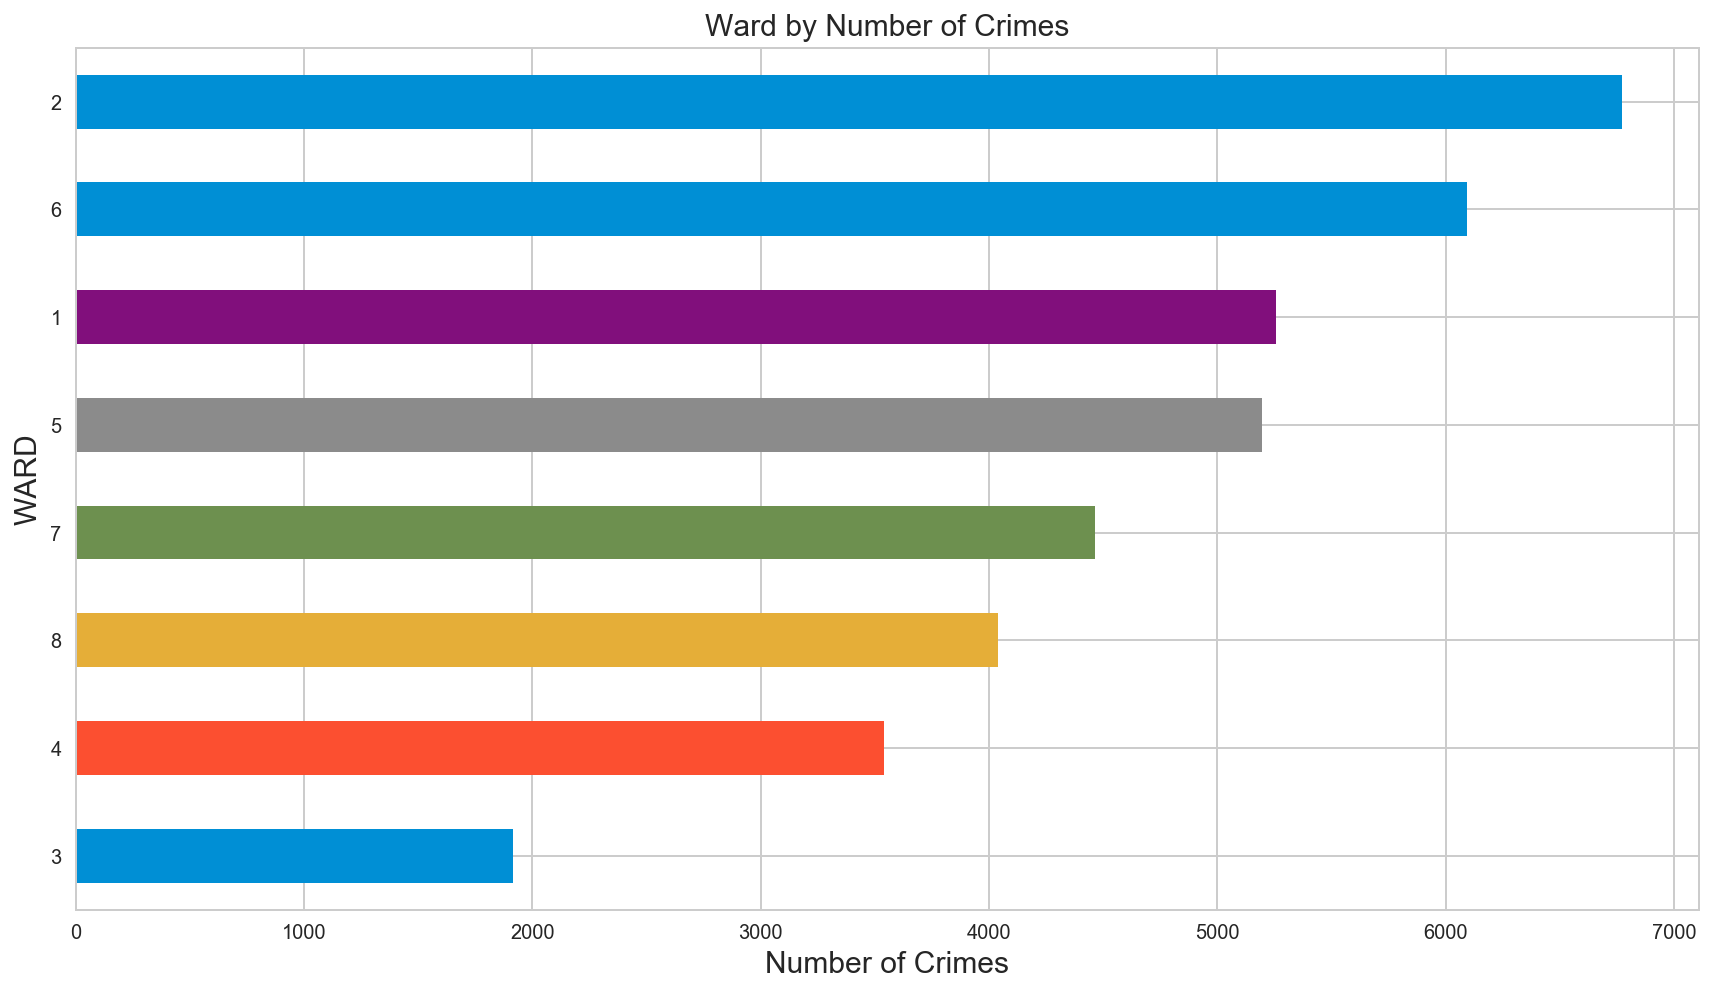

In [89]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df15.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [90]:
df14_ncluster = df14.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [91]:
df14_ward = df14.groupby('WARD')['OFFENSE'].value_counts()

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


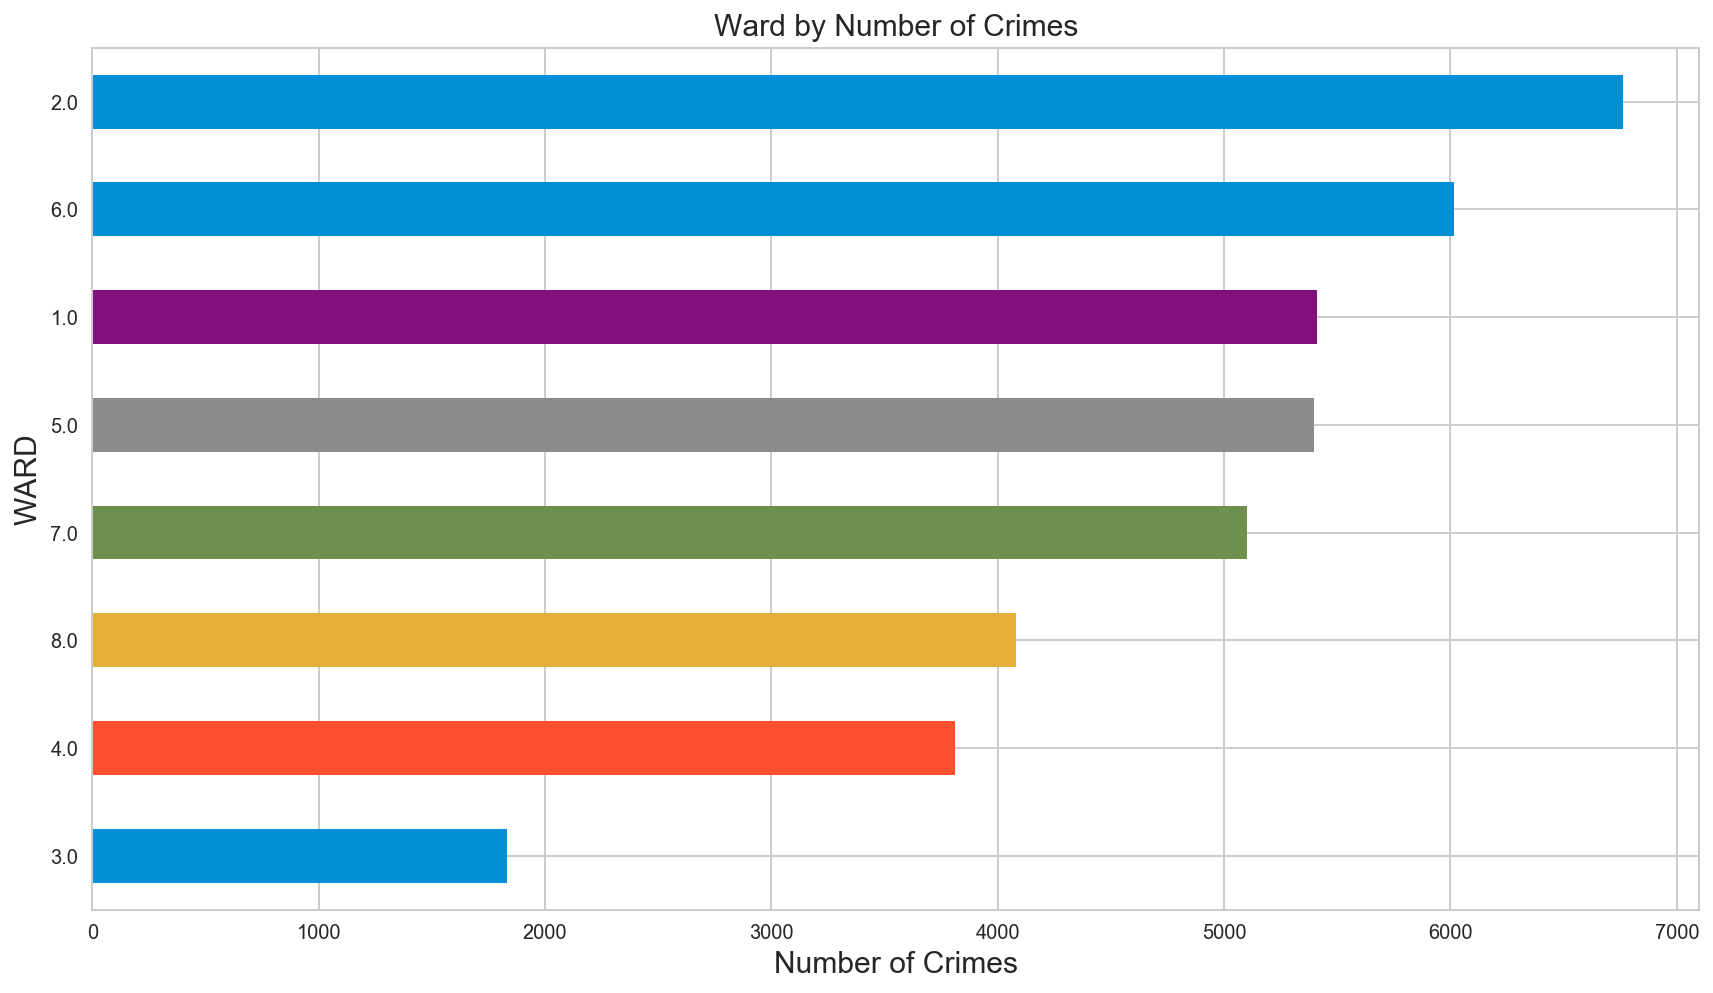

In [92]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df14.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [93]:
df13_ncluster = df13.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [94]:
df13_ward = df13.groupby('WARD')['OFFENSE'].value_counts()

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


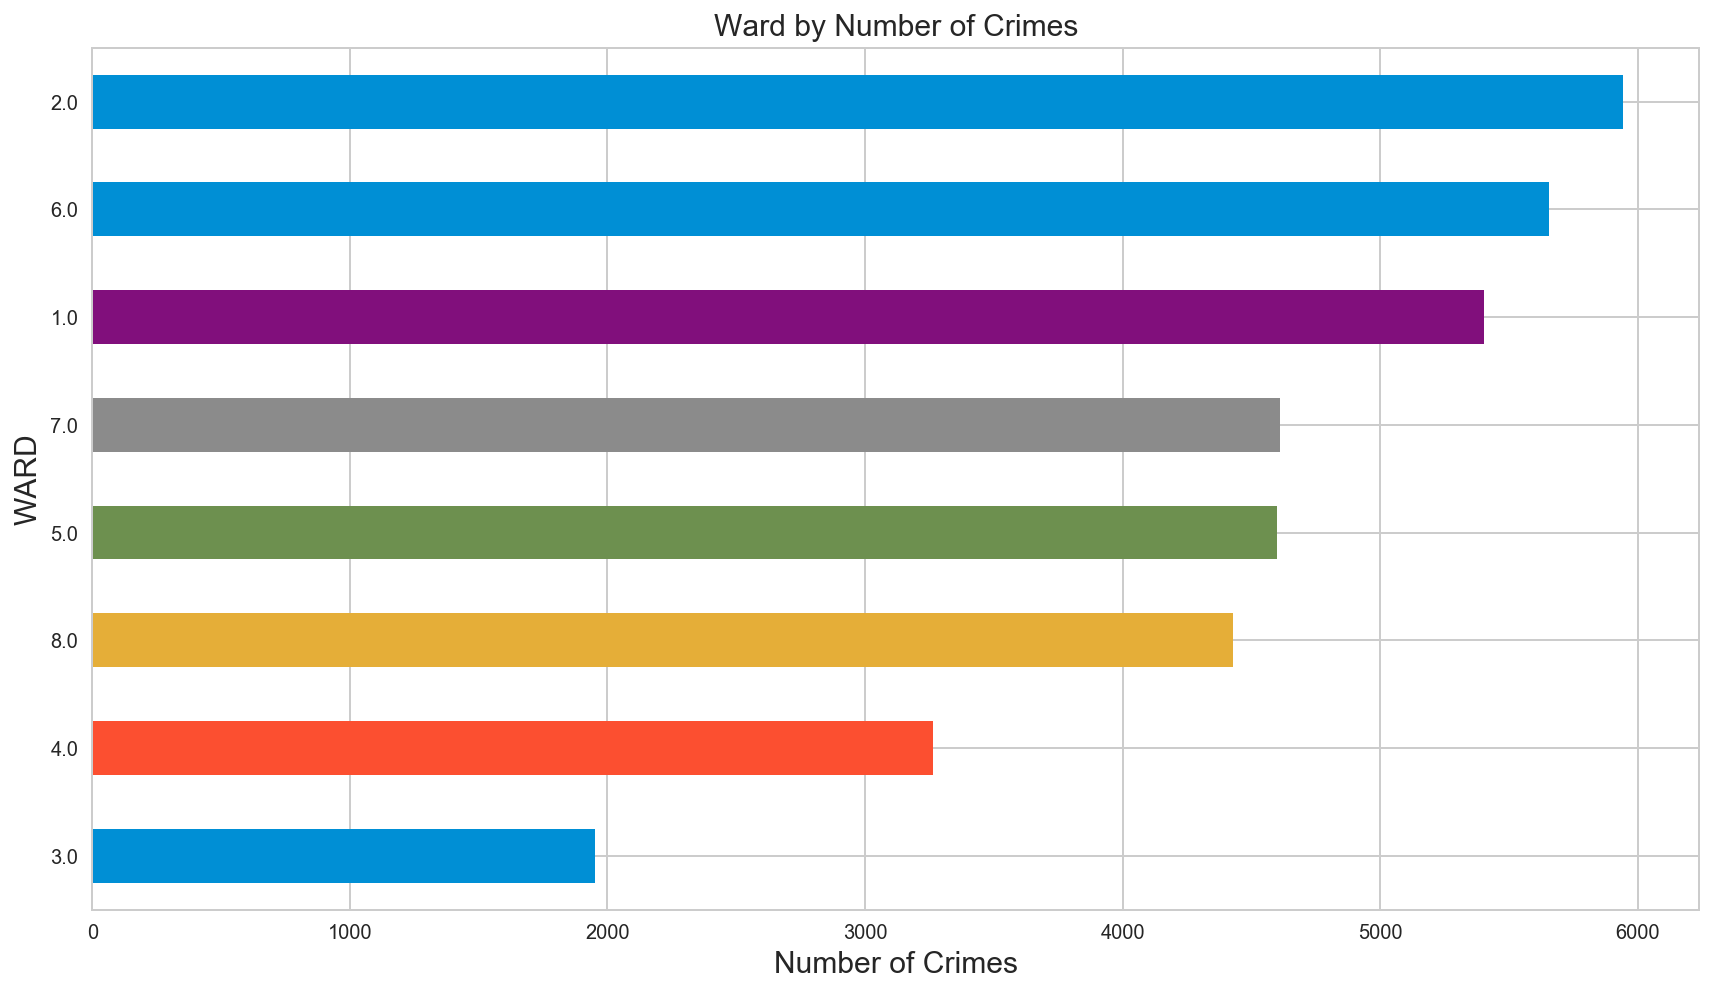

In [95]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df13.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [96]:
df12_ncluster = df12.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()

In [97]:
df12_ward = df12.groupby('WARD')['OFFENSE'].value_counts()

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


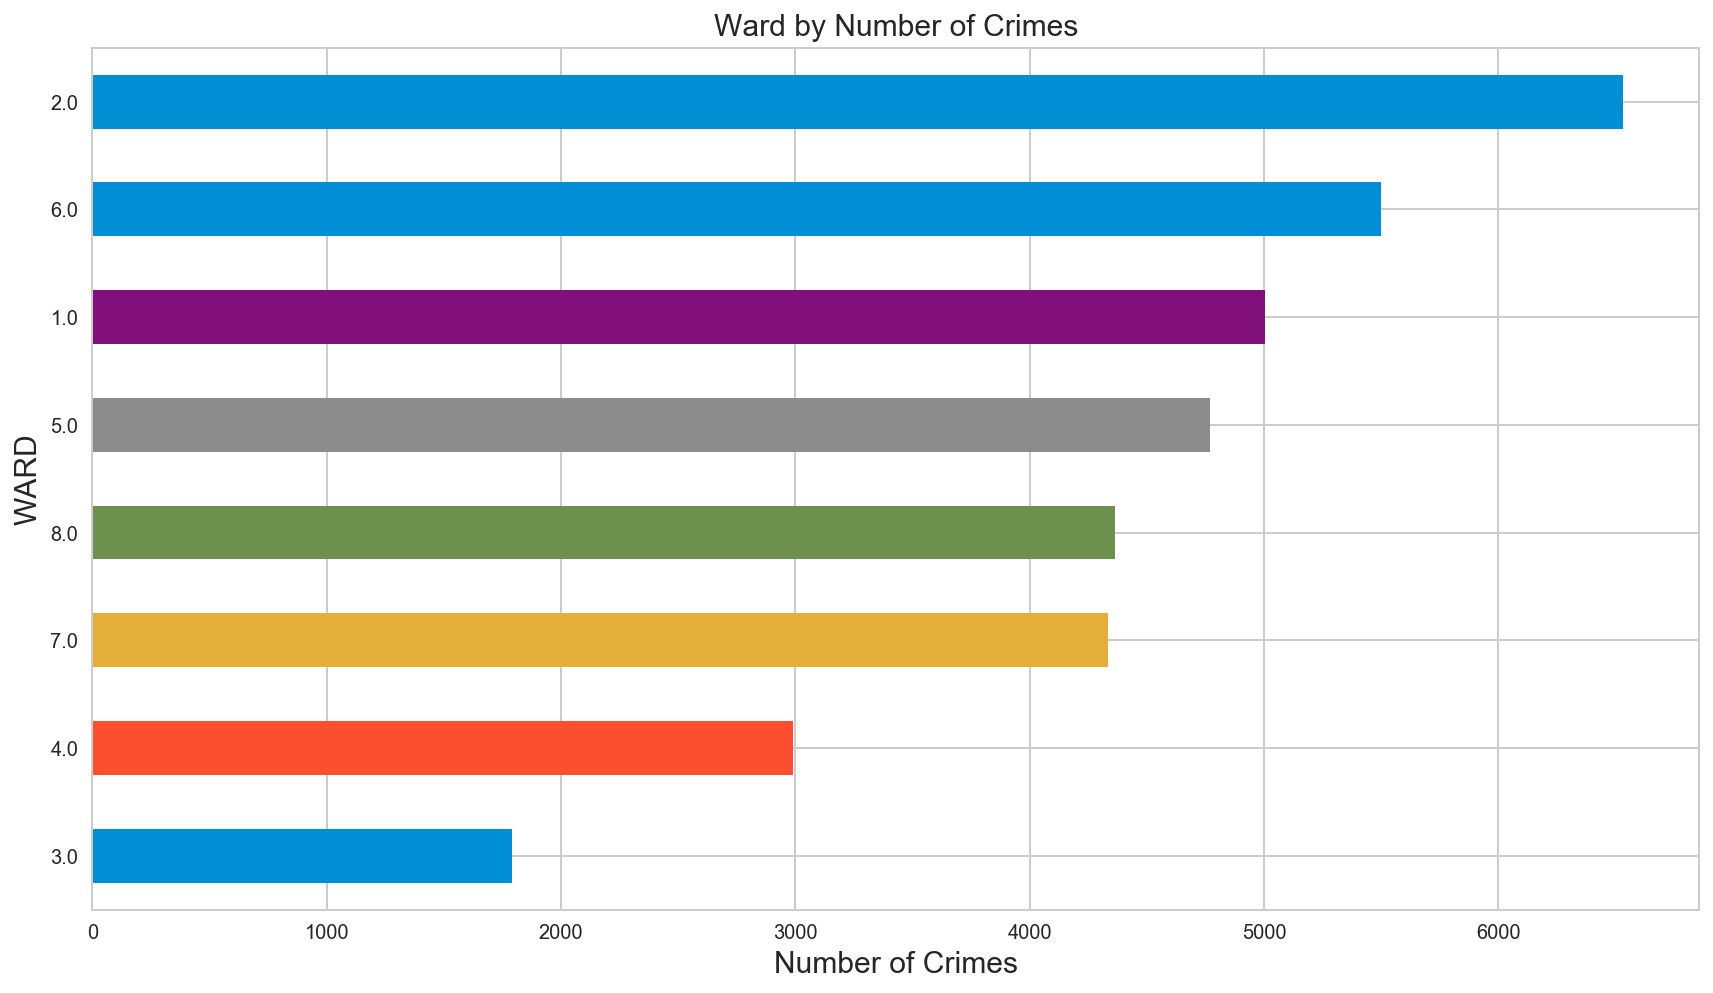

In [98]:
# Plotting Ward vs Number of Crimes to identify annual trends

fig, ax = plt.subplots(figsize=(12,7))
plt.ylabel('Ward', size =15)
plt.xlabel('Number of Crimes', size =15)
plt.title('Ward by Number of Crimes', size=15)
df12.groupby(['WARD']).count()['OFFENSE'].sort_values().plot(kind = 'barh',ax=ax)

In [99]:
df = pd.read_csv('./crime_by_wards.csv')

In [100]:
df.head()

,Year,Ward,Offense,Count
0,2017,1,THEFT F/AUTO,1933
1,2017,1,THEFT/OTHER,1853
2,2017,1,ROBBERY,272
3,2017,1,MOTOR VEHICLE THEFT,218
4,2017,1,BURGLARY,162


In [101]:
df.Offense.unique()

array(['THEFT F/AUTO', 'THEFT/OTHER', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'BURGLARY', 'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE', 'HOMICIDE',
       'ARSON'], dtype=object)

In [102]:
df[(df.Ward == 8) & (df.Offense == 'THEFT F/AUTO')]

,Year,Ward,Offense,Count
59,2017,8,THEFT F/AUTO,677
126,2016,8,THEFT F/AUTO,777
196,2015,8,THEFT F/AUTO,683
267,2014,8,THEFT F/AUTO,691
339,2013,8,THEFT F/AUTO,593
409,2012,8,THEFT F/AUTO,613


In [103]:
df[(df.Ward == 8) & (df.Offense == 'THEFT/OTHER')]

,Year,Ward,Offense,Count
58,2017,8,THEFT/OTHER,1157
125,2016,8,THEFT/OTHER,1200
195,2015,8,THEFT/OTHER,1119
266,2014,8,THEFT/OTHER,1060
335,2013,8,THEFT/OTHER,1020
406,2012,8,THEFT/OTHER,830


In [104]:
df[(df.Ward == 8) & (df.Offense == 'ROBBERY')]

,Year,Ward,Offense,Count
61,2017,8,ROBBERY,362
128,2016,8,ROBBERY,504
199,2015,8,ROBBERY,529
270,2014,8,ROBBERY,549
337,2013,8,ROBBERY,714
407,2012,8,ROBBERY,796


In [105]:
df[(df.Ward == 8) & (df.Offense == 'MOTOR VEHICLE THEFT')]

,Year,Ward,Offense,Count
62,2017,8,MOTOR VEHICLE THEFT,343
129,2016,8,MOTOR VEHICLE THEFT,405
198,2015,8,MOTOR VEHICLE THEFT,541
271,2014,8,MOTOR VEHICLE THEFT,459
340,2013,8,MOTOR VEHICLE THEFT,579
410,2012,8,MOTOR VEHICLE THEFT,552


In [106]:
df[(df.Ward == 8) & (df.Offense == 'BURGLARY')]

,Year,Ward,Offense,Count
63,2017,8,BURGLARY,315
130,2016,8,BURGLARY,308
200,2015,8,BURGLARY,439
269,2014,8,BURGLARY,597
336,2013,8,BURGLARY,752
405,2012,8,BURGLARY,842


In [107]:
df[(df.Ward == 8) & (df.Offense == 'ASSAULT W/DANGEROUS WEAPON')]

,Year,Ward,Offense,Count
60,2017,8,ASSAULT W/DANGEROUS WEAPON,470
127,2016,8,ASSAULT W/DANGEROUS WEAPON,591
197,2015,8,ASSAULT W/DANGEROUS WEAPON,610
268,2014,8,ASSAULT W/DANGEROUS WEAPON,620
338,2013,8,ASSAULT W/DANGEROUS WEAPON,668
408,2012,8,ASSAULT W/DANGEROUS WEAPON,656


In [108]:
df[(df.Ward == 8) & (df.Offense == 'SEX ABUSE')]

,Year,Ward,Offense,Count
64,2017,8,SEX ABUSE,48
131,2016,8,SEX ABUSE,57
202,2015,8,SEX ABUSE,54
272,2014,8,SEX ABUSE,65
341,2013,8,SEX ABUSE,62
411,2012,8,SEX ABUSE,42


In [109]:
df[(df.Ward == 8) & (df.Offense == 'HOMICIDE')]

,Year,Ward,Offense,Count
65,2017,8,HOMICIDE,46
132,2016,8,HOMICIDE,46
201,2015,8,HOMICIDE,56
273,2014,8,HOMICIDE,35
342,2013,8,HOMICIDE,27
412,2012,8,HOMICIDE,23


In [110]:
df[(df.Ward == 8) & (df.Offense == 'ARSON')]

,Year,Ward,Offense,Count
66,2017,8,ARSON,1
133,2016,8,ARSON,3
203,2015,8,ARSON,7
274,2014,8,ARSON,6
343,2013,8,ARSON,15
413,2012,8,ARSON,8


# Importing DC3 data, which has been through data cleaning/EDA already

In [111]:
dc3 = pd.read_csv('./dc_crime3.csv')
ward = pd.read_csv('./warddata.csv')

In [112]:
dc3.head().columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'X',
       'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'XBLOCK',
       'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'PSA_ID', 'DistrictID',
       'SHIFT_Code', 'OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE', 'AGE',
       'TIME_TO_REPORT', 'DATE', 'Year', 'Month', 'Day', 'hour', 'dayofyear',
       'week', 'weekofyear', 'dayofweek', 'weekday', 'quarter'],
      dtype='object')

In [1]:
# Dropping unnecessary columns

dc3.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],axis=1,inplace=True)

NameError: name 'dc3' is not defined

In [114]:
ward.columns

Index(['year', 'ANC', 'Housing_Prices', 'Unemployment'], dtype='object')

In [115]:
dc3.shape

(231502, 41)

In [116]:
ward.shape

(157, 4)

In [117]:
ward.head()

,year,ANC,Housing_Prices,Unemployment
0,1997,1,323000,3.6
1,2006,8,289000,17.0
2,2008,1,583700,5.6
3,2008,2,634800,3.1
4,2008,3,834500,1.6


In [118]:
dc3.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,XBLOCK,YBLOCK,WARD,...,Year,Month,Day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,-76.999518,38.901924,9074624,2012-04-25 00:00:00,MIDNIGHT,OTHERS,SEX ABUSE,400042.0,137118.0,6,...,2009.0,6.0,1.0,6.0,152.0,23.0,23.0,0.0,0.0,2.0
1,-76.995541,38.905032,10123633,2012-02-29 00:00:00,MIDNIGHT,OTHERS,SEX ABUSE,400387.0,137463.0,6,...,2010.0,8.0,27.0,7.0,239.0,34.0,34.0,4.0,4.0,3.0
2,-76.948897,38.885680,11102619,2012-05-14 00:00:00,MIDNIGHT,GUN,HOMICIDE,404434.0,135316.0,7,...,2011.0,7.0,17.0,2.0,198.0,28.0,28.0,6.0,6.0,3.0
3,-76.967571,38.855724,11141272,2012-06-25 00:00:00,MIDNIGHT,OTHERS,HOMICIDE,402815.0,131990.0,8,...,2011.0,9.0,26.0,6.0,269.0,39.0,39.0,0.0,0.0,3.0
4,-76.939620,38.910718,11158196,2012-01-05 00:00:00,MIDNIGHT,OTHERS,HOMICIDE,405237.0,138096.0,7,...,2011.0,10.0,27.0,0.0,300.0,43.0,43.0,3.0,3.0,4.0


In [119]:
# Using get_dummies on the SHIFT column so it can be used as a feature for modeling

dc3 = pd.get_dummies(dc3, columns=['SHIFT'], drop_first=True)

In [120]:
dc3.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK',
       'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'PSA_ID', 'DistrictID',
       'SHIFT_Code', 'OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE', 'AGE',
       'TIME_TO_REPORT', 'DATE', 'Year', 'Month', 'Day', 'hour', 'dayofyear',
       'week', 'weekofyear', 'dayofweek', 'weekday', 'quarter',
       'SHIFT_EVENING', 'SHIFT_MIDNIGHT'],
      dtype='object')

In [122]:
ward.columns

Index(['year', 'ANC', 'Housing_Prices', 'Unemployment'], dtype='object')

# Defining features and modeling

In [128]:
# Defined features for modeling as X variable

features = ['LONGITUDE','LATITUDE','PSA','AGE','SHIFT_EVENING', 'SHIFT_MIDNIGHT','METHOD_Code','Year','Month','Day','hour','dayofyear','WARD','week','quarter']

In [129]:
dc3.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK',
       'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'PSA_ID', 'DistrictID',
       'SHIFT_Code', 'OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE', 'AGE',
       'TIME_TO_REPORT', 'DATE', 'Year', 'Month', 'Day', 'hour', 'dayofyear',
       'week', 'weekofyear', 'dayofweek', 'weekday', 'quarter',
       'SHIFT_EVENING', 'SHIFT_MIDNIGHT'],
      dtype='object')

In [130]:
# Using fillna to get rid of null values in the dataframe

dc3.fillna(0,inplace=True)

In [132]:
# Defining X and y variables

X = dc3[features]
y = dc3['OFFENSE_Code']

In [133]:
# Train, test split with a random state of 42

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [134]:
# Dropping null values

X_train.dropna(inplace=True)

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
# Dropping null values

X_test.dropna(inplace=True)

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [136]:
# Verifying no null values in data

X_train.isnull().sum().sum()

0

In [137]:
# Verifying no null values in data

X_test.isnull().sum().sum()

0

In [138]:
# Scaling data in preparation for modeling

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [139]:
# Verifying shapes are the same 

X_train.shape

(173626, 15)

In [140]:
# Verifying shapes are the same 


y_train.shape

(173626,)

In [142]:
# Verifying shapes are the same 


X_test.shape

(57876, 15)

In [71]:
# Verifying shapes are the same 

y_test.shape

(57876,)

# TPOT First Model


In [102]:
pipeline_optimizer = TPOTClassifier(generations=2, population_size=20,cv=5, verbosity=2,
                      config_dict='TPOT light')

In [103]:
pipeline_optimizer.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.5910404395573121


Generation 2 - Current best internal CV score: 0.5910404395573121



Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=9, min_samples_leaf=13, min_samples_split=12)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=2, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=20, periodic_checkpoint_folder=None,
        population_size=20, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [104]:
print(pipeline_optimizer.score(X_test, y_test))

0.5934065934065934


In [155]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [156]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
dt.score(X_train,y_train)

0.5468132652943684

In [158]:
dt.score(X_test,y_test)

0.5402239270163799

In [177]:
cross_val_score(dt, X, y,scoring='accuracy',cv=5).mean()

0.4823424295181299

In [160]:
rf.feature_importances_

array([0.12721787, 0.12640386, 0.06321824, 0.14629497, 0.01068265,
       0.00917052, 0.06820908, 0.05335156, 0.04251621, 0.08744546,
       0.08154455, 0.09403749, 0.0192574 , 0.07065013])

In [161]:
important_features = pd.Series(data=dt.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [162]:
important_features

METHOD_Code       0.395665
AGE               0.243054
PSA               0.120549
hour              0.082480
LONGITUDE         0.045136
LATITUDE          0.044909
WARD              0.020519
Year              0.017460
SHIFT_MIDNIGHT    0.013668
SHIFT_EVENING     0.010839
dayofyear         0.003062
Day               0.002004
week              0.000645
Month             0.000010
quarter           0.000000
dtype: float64

# Random Forest - Best Model

# Even though TPOT stated DecisionTreeClassifier was the best model, we manually tested both models and found the RF model to have a better cross_val_score. 

In [164]:
rf = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [165]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
rf.score(X_train,y_train)

0.55037264004239

In [167]:
rf.score(X_test,y_test)

0.5429884580827977

In [168]:
cross_val_score(rf, X, y,scoring='accuracy',cv=5).mean()

0.5264876245847796

In [169]:
important_features = pd.Series(data=rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [170]:
important_features

METHOD_Code       0.313403
AGE               0.245524
PSA               0.124617
hour              0.075233
LATITUDE          0.057188
LONGITUDE         0.050762
WARD              0.046789
SHIFT_MIDNIGHT    0.031808
Year              0.018312
SHIFT_EVENING     0.016622
dayofyear         0.007197
week              0.005195
Day               0.003418
Month             0.002727
quarter           0.001206
dtype: float64

C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


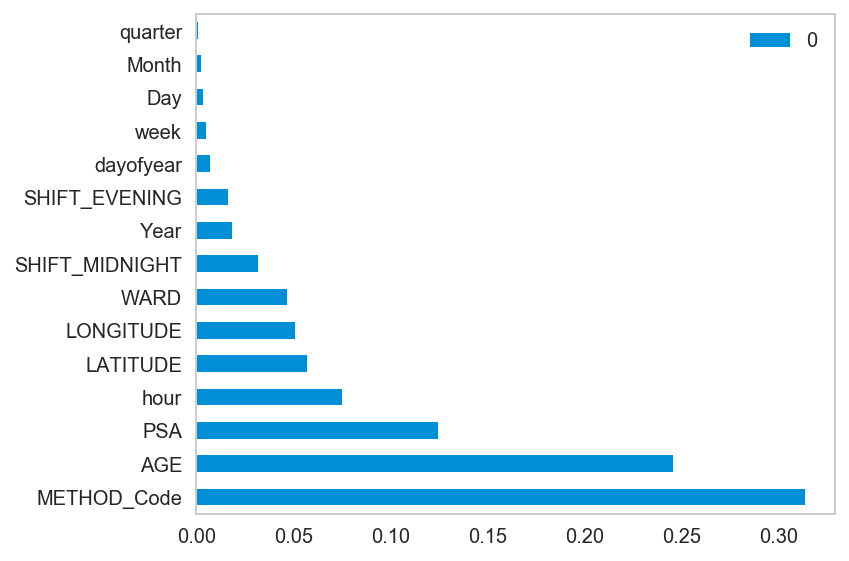

In [206]:
pd.DataFrame(important_features).plot(kind = 'barh', grid=False)

In [172]:
# Importing more packages for model evaluation

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.svm import LinearSVC

In [173]:
y_pred = rf.predict(X_test)

In [174]:
# Function to allow us to obtain aucroc score for a multi-class y variable

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    return roc_auc_score(y_test, y_pred, average=average)

In [175]:
multiclass_roc_auc_score(y_test,y_pred)

0.5862626051654125

In [176]:
metrics.precision_score(y_test, y_pred,average='micro')

0.5429884580827977

In [177]:
metrics.recall_score(y_test, y_pred, average='macro')

0.24935288480700654

In [180]:
# Function to produce confusion matrix, precision, recall and f1-score

def classifications(y_test, y_pred):
    print('Mean accuracy score %s ' % metrics.accuracy_score(y_test, y_pred), '\n')
    print(confusion_matrix(y_test, y_pred), '\n')
    print(classification_report(y_test, y_pred))

In [182]:
classifications(y_test,y_pred)

Mean accuracy score 0.5429884580827977  

[[17665  4319   151    18    19    30     0     0     0]
 [ 7199 10165   107     2    13    63     0     0     0]
 [ 2275  1540   273    27    52    55     0     0     0]
 [ 1007   124     3  1761   735     4     0     0     0]
 [ 2619   303     6   752  1481     3     0     0     0]
 [ 2044  2186    95     0     3    78     0     0     0]
 [   15     6     0    92    77     0     3     0     0]
 [  285   116     2    40    20     4     0     0     0]
 [   34     3     0     0     0     2     0     0     0]] 



C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.53      0.80      0.64     22202
          2       0.54      0.58      0.56     17549
          3       0.43      0.06      0.11      4222
          4       0.65      0.48      0.56      3634
          5       0.62      0.29      0.39      5164
          6       0.33      0.02      0.03      4406
          7       1.00      0.02      0.03       193
          8       0.00      0.00      0.00       467
          9       0.00      0.00      0.00        39

avg / total       0.52      0.54      0.50     57876



In [307]:
cm = confusion_matrix(y_test,y_pred)

In [308]:
cm

array([[17985,  4025,   133,    16,    16,    27,     0,     0,     0],
       [ 7630,  9760,   103,     1,     6,    49,     0,     0,     0],
       [ 2358,  1494,   242,    32,    43,    53,     0,     0,     0],
       [ 1027,   116,     1,  1738,   749,     3,     0,     0,     0],
       [ 2685,   271,     7,   730,  1470,     1,     0,     0,     0],
       [ 2093,  2142,    87,     0,     2,    82,     0,     0,     0],
       [   15,     6,     0,    80,    87,     0,     5,     0,     0],
       [  296,   108,     3,    32,    26,     2,     0,     0,     0],
       [   35,     3,     0,     0,     0,     1,     0,     0,     0]],
      dtype=int64)